# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import the TensorFlow library
import tensorflow as tf

**Let us check the version of tensorflow.**

In [ ]:
print(tf.__version__)


2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py

path = '/content/drive/MyDrive/Colab Notebooks/Project/SVHN_single_grey1.h5'

# Open the file in read mode
with h5py.File(path, 'r') as f:
    # List all groups (you can think of groups like directories)
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data from the group
    data = list(f[a_group_key])



Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


Check the number of images in the training and the testing dataset.

In [ ]:

# Open the HDF5 file in read mode ('r') and assign it to the variable 'f'.
# The 'with' statement ensures that the file is properly closed after its suite finishes.
with h5py.File(path, 'r') as f:
    # Access the 'X_train' dataset from the file and load all its contents into memory.
    X_train = f['X_train'][:]

    # Access the 'X_test' dataset from the file and load all its contents into memory.
    X_test = f['X_test'][:]

# The first dimension (index 0) in the shape of the dataset represents the number of images.
num_images_train = X_train.shape[0]  # Number of training images
num_images_test = X_test.shape[0]    # Number of testing images

print("Number of images in the training dataset:", num_images_train)
print("Number of images in the testing dataset:", num_images_test)


Number of images in the training dataset: 42000
Number of images in the testing dataset: 18000


**Observation:**

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

**NOTE** : The images will be in a format suitable for direct visualization, such as a 3D array (with dimensions representing the number of images, height, width, and possibly color channels).

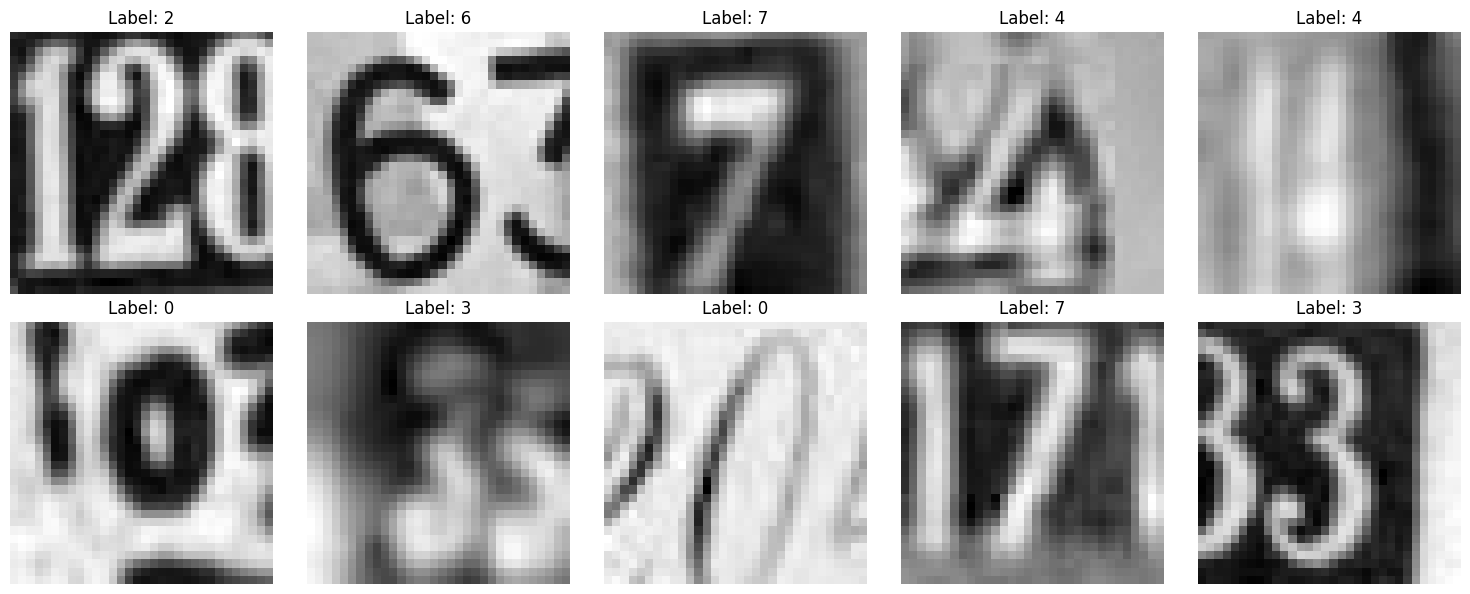

First 10 labels: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
import matplotlib.pyplot as plt
import h5py

# Load the dataset
path = '/content/drive/MyDrive/Colab Notebooks/Project/SVHN_single_grey1.h5'
with h5py.File(path, 'r') as f:
    X_train = f['X_train'][:]
    Y_train = f['y_train'][:]

# Plot the first 10 images
plt.figure(figsize=(15, 6))  # Set the figure size to be large enough to show details
for i in range(10):
    plt.subplot(2, 5, i + 1)  # Arrange the plots in 2 rows and 5 columns
    plt.imshow(X_train[i], cmap='gray')  # Display the ith image. Use cmap='gray' if it's a grayscale image
    plt.title(f"Label: {Y_train[i]}")  # Set the title to show the corresponding label
    plt.axis('off')  # Turn off the axis to make it cleaner

plt.tight_layout()
plt.show()

# Print the first 10 labels
print("First 10 labels:", Y_train[:10])


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
from tensorflow.keras.utils import to_categorical

with h5py.File(path, 'r') as f:
    X_train = f['X_train'][:]
    X_test = f['X_test'][:]
    y_train = f['y_train'][:]
    y_test = f['y_test'][:]

# Print the shape and pixel array of the first image in the training dataset
print("Shape of the first training image:", X_train[0].shape)
print("Array of pixels for the first training image:\n", X_train[0])





Shape of the first training image: (32, 32)
Array of pixels for the first training image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [ ]:
# Normalize the train and test datasets by dividing by 255
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0




Print the shapes of Training and Test data

In [ ]:
# Print the new shapes of the train and test datasets
print("Shape of the normalized training dataset:", X_train_normalized.shape)
print("Shape of the normalized testing dataset:", X_test_normalized.shape)



Shape of the normalized training dataset: (42000, 32, 32)
Shape of the normalized testing dataset: (18000, 32, 32)


### **One-hot encode output**

In [ ]:
# One-hot encode the target variable
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Check the first encoded target variable
print("First 10 entries of the one-hot encoded training labels:\n", y_train_encoded[:10])

First 10 entries of the one-hot encoded training labels:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


**Observation:**


1.   Distribution of Class: From the given one-hot encoded labels, we can observe the distribution of the first few classes. For example, we see a few instances of the class represented by [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.] which corresponds to the digit "1" if we're indexing from zero. This immediate snapshot suggests a variation in the class distribution, but we would need to look at the entire dataset to draw meaningful conclusions about class balance.
2.   Model: The length of the one-hot encoded vectors also tells us the number of neurons needed in the output layer of the neural network for classification. In this case, it looks like there are 10 classes (assuming this dataset corresponds to digits 0-9), so the model should have an output layer with 10 neurons.




## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
import tensorflow as tf
import numpy as np
import random
import os

# Fixing the seed for random number generators
seed_value= 42

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)




### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the function to create the model
def nn_model_1(input_shape, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),  # First hidden layer with 64 nodes
        Dense(32, activation='relu'),                            # Second hidden layer with 32 nodes
        Dense(num_classes, activation='softmax')                 # Output layer with 'softmax' activation
    ])

    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    return model

# Call the nn_model_1 function and store the model in a new variable
model = nn_model_1((1024,), 10)

# Print the summary of the model
model.summary()

# Data is preprocessed and reshaped to have the shape (number of samples, 1024)
X_train_normalized = X_train_normalized.reshape(-1, 1024)  # Reshape from (num_samples, 32, 32) to (num_samples, 1024)

# Fit the model on the training data
history = model.fit(
    X_train_normalized, y_train_encoded,  # X_train_normalized should have shape (-1, 1024)
    validation_split=0.2,
    batch_size=128,
    verbose=1,
    epochs=20
)

# history contains the logs of the training process, which can be used for visualization later


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
263/263 [==============================] - 3s 9ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 2s 7ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [============

### **Plot the Training and Validation Accuracies and write down your Observations.**

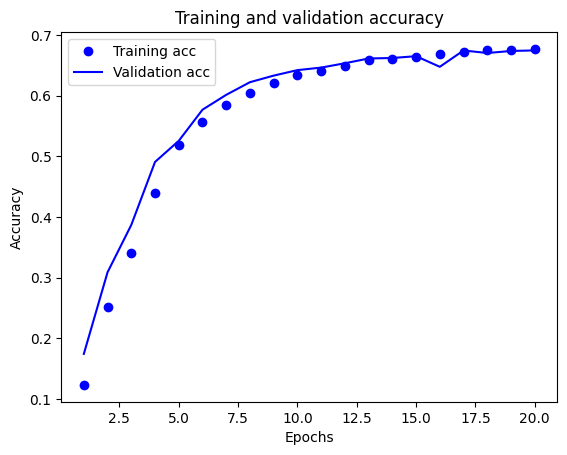

In [ ]:
import matplotlib.pyplot as plt



# Extract accuracy and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extract the number of epochs
epochs = range(1, len(acc) + 1)

# Plot accuracy for each epoch
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


**Observations:_______**



1.   Both the training and validation accuracy increase as the number of epochs grows, indicating that the model is learning and improving its predictions over time.
2. After an initial rapid improvement, the increase in accuracy seems to slow down, and both curves begin to plateau. Model is starting to converge and is finding a stable set of parameters (weights and biases) that predict the target variable well.
3. No Overfitting Indicated; overfitting is typically indicated by a decrease in validation accuracy while training accuracy continues to increase.

NOTE: Experimenting with more epochs could be beneficial to see if the model can improve further.


Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
import random
import os

# Import Keras backend to manage things like the session state
from tensorflow.keras import backend as K

# Clearing the current TensorFlow graph and starting a new one; helpful to avoid clutter from old models and layers
K.clear_session()

# Set a specific number to make the random processes repeatable
seed_value = 42

# Ensure that Python’s hash-based operations are consistent and repeatable
os.environ['PYTHONHASHSEED'] = str(seed_value)

# Make Python's random number generation repeatable by setting a seed
random.seed(seed_value)

# Ensure NumPy's random numbers are predictable by setting a seed
np.random.seed(seed_value)

# Make TensorFlow's random number generation consistent by setting a seed
tf.random.set_seed(seed_value)


### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def nn_model_2(input_shape, num_classes):
    model = Sequential([
        Dense(256, activation='relu', input_shape=input_shape),  # First hidden layer with 256 nodes
        Dense(128, activation='relu'),  # Second hidden layer with 128 nodes
        Dropout(0.2),  # Dropout layer with 20% of the nodes dropped out
        Dense(64, activation='relu'),  # Third hidden layer with 64 nodes
        Dense(64, activation='relu'),  # Fourth hidden layer with 64 nodes
        Dense(32, activation='relu'),  # Fifth hidden layer with 32 nodes
        BatchNormalization(),  # Batch Normalization layer
        Dense(num_classes, activation='softmax')  # Output layer with softmax activation
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.0005),
        metrics=['accuracy']
    )

    return model

# Assuming X_train_normalized and y_train_encoded are already defined and preprocessed
model_2 = nn_model_2((1024,), 10)
model_2.summary()

# Reshape data if necessary, fit the model, and store the history
X_train_reshaped = X_train_normalized.reshape(-1, 1024)  # Adjust this based on your data's shape
history_2 = model_2.fit(
    X_train_reshaped, y_train_encoded,
    validation_split=0.2,
    batch_size=128,
    verbose=1,
    epochs=30
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

### **Plot the Training and Validation Accuracies and write down your Observations.**

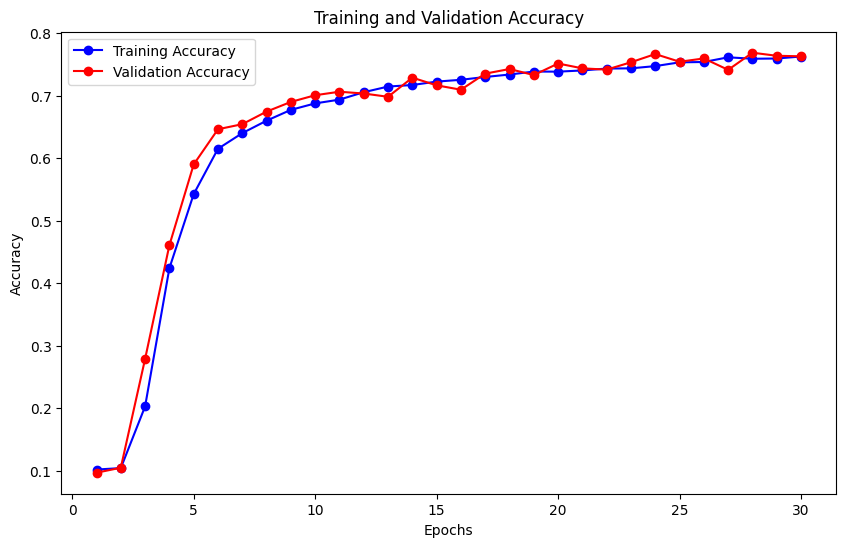

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the history object
training_accuracy = history_2.history['accuracy']
validation_accuracy = history_2.history['val_accuracy']

# Generate a count of the number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Observations:_______**

1. There’s a sharp increase in both training and validation accuracies during the initial epochs. This suggests that the model is learning from the data quickly.
2. The fact that both the training and validation accuracies level off suggests that the model is nearing its performance limit
3. The validation accuracy closely tracks the training accuracy, which is a good sign that the model is generalizing well and not overfitting significantly.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# X_test_normalized is test data that needs to be reshaped
X_test_reshaped = X_test_normalized.reshape(-1, 1024)  # Reshape to (-1, 1024) if images are 32x32 pixels

# Make predictions using the reshaped test data
predictions = model_2.predict(X_test_reshaped)




563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:

# Convert predictions from one-hot encoded vectors to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to class labels
true_classes = np.argmax(y_test_encoded, axis=1)



### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

Classificaion report:               precision    recall  f1-score   support

           0       0.84      0.75      0.79      1814
           1       0.74      0.79      0.77      1828
           2       0.77      0.80      0.79      1803
           3       0.62      0.77      0.69      1719
           4       0.79      0.83      0.81      1812
           5       0.76      0.68      0.72      1768
           6       0.80      0.74      0.77      1832
           7       0.83      0.77      0.80      1808
           8       0.72      0.72      0.72      1812
           9       0.75      0.74      0.75      1804

    accuracy                           0.76     18000
   macro avg       0.76      0.76      0.76     18000
weighted avg       0.76      0.76      0.76     18000

[[1363   79   26   54   41   11   57   24   62   97]
 [  21 1451   32   85   88   16   22   53   33   27]
 [  10   35 1447  101   34   24    7   77   27   41]
 [  17   55   70 1323   28   92   14   43   49   28]
 [  19 

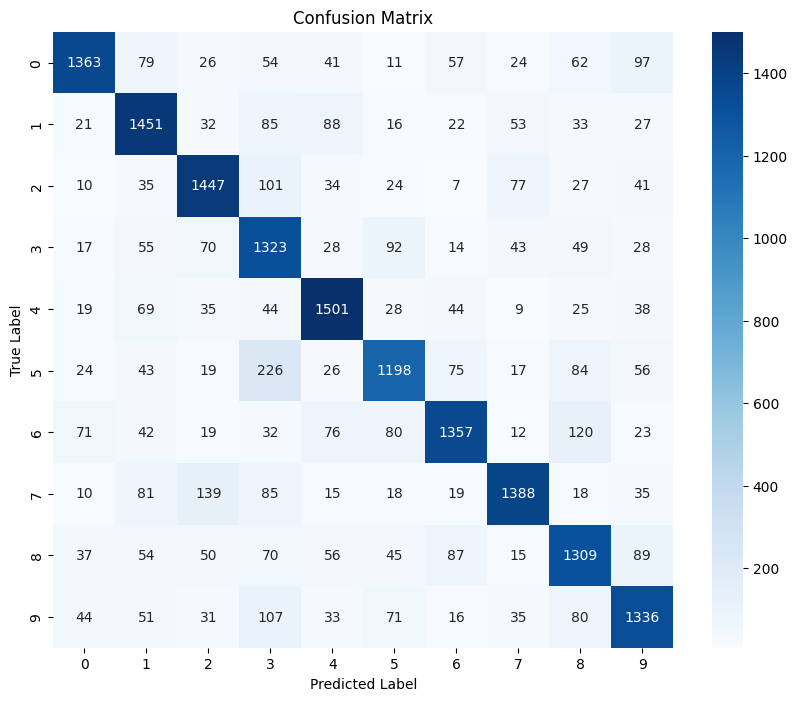

In [ ]:
# Print the classification report
print("Classificaion report:", classification_report(true_classes, predicted_classes))

# Compute and print the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

# (Optional) Plot the confusion matrix using matplotlib or seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Final Observations:__________**

1. The model achieves a consistent accuracy across different metrics (precision, recall, f1-score) with an overall accuracy of 0.76, indicating that the model performs fairly well.

2. Class 5 has the lowest recall, which means it has more false negatives compared to other classes.

3. Class 0 shows high precision, indicating that when the model predicts a 0, it is correct a significant portion of the time.

4. Class 1 and class 4 exhibit high recall, meaning they have a lower number of false negatives; most of the actual 1s and 4s were correctly identified.
Support:
* The support column, which indicates the number of true occurrences of each class in the dataset, appears to be fairly balanced, which means there's a relatively even distribution of classes in the test set.
* The highest numbers, which represent correct predictions, are on the diagonal. This is good as it indicates that the majority of predictions for each class are correct.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:

# Open the file in read mode
with h5py.File(path, 'r') as f:
    # Load the datasets
    X_train = f['X_train'][:]  # Training features
    y_train = f['y_train'][:]  # Training labels
    X_test = f['X_test'][:]    # Testing features
    y_test = f['y_test'][:]    # Testing labels
    # Load validation sets
    X_val = f['X_val'][:]      # Validation features
    y_val = f['y_val'][:]      # Validation labels


Check the number of images in the training and the testing dataset.

In [ ]:
# The first dimension (index 0) in the shape of the dataset represents the number of images.
num_images_train = X_train.shape[0]  # Number of training images
num_images_test = X_test.shape[0]    # Number of testing images

# Count of images in the respective datasets.
print("Number of images in the training dataset:", num_images_train)
print("Number of images in the testing dataset:", num_images_test)


Number of images in the training dataset: 42000
Number of images in the testing dataset: 18000


**Observation:**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
import h5py
import numpy as np
from tensorflow.keras.utils import to_categorical



# Print the shape and pixel values of the first image
print("Shape of the first training image:", X_train[0].shape)
print("Pixel values of the first training image:\n", X_train[0])




Shape of the first training image: (32, 32, 1)
Pixel values of the first training image:
 [[[ 33.0704]
  [ 30.2601]
  [ 26.852 ]
  ...
  [ 71.4471]
  [ 58.2204]
  [ 42.9939]]

 [[ 25.2283]
  [ 25.5533]
  [ 29.9765]
  ...
  [113.0209]
  [103.3639]
  [ 84.2949]]

 [[ 26.2775]
  [ 22.6137]
  [ 40.4763]
  ...
  [113.3028]
  [121.775 ]
  [115.4228]]

 ...

 [[ 28.5502]
  [ 36.212 ]
  [ 45.0801]
  ...
  [ 24.1359]
  [ 25.0927]
  [ 26.0603]]

 [[ 38.4352]
  [ 26.4733]
  [ 23.2717]
  ...
  [ 28.1094]
  [ 29.4683]
  [ 30.0661]]

 [[ 50.2984]
  [ 26.0773]
  [ 24.0389]
  ...
  [ 49.6682]
  [ 50.853 ]
  [ 53.0377]]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshape the datasets to add a channel dimension (1 for grayscale)
X_train = X_train.reshape((-1, 32, 32, 1))
X_test = X_test.reshape((-1, 32, 32, 1))



Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalize the datasets by dividing by the max pixel value
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0



Print New shape of Training and Test

In [ ]:
# Print the new shapes of the datasets
print("New shape of training data:", X_train_normalized.shape)
print("New shape of test data:", X_test_normalized.shape)



New shape of training data: (42000, 32, 32, 1)
New shape of test data: (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# One-hot encode the labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Check the first few encoded labels
print("First 5 training labels, one-hot encoded:\n", y_train_encoded[:5])

First 5 training labels, one-hot encoded:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


**Observation:**
The data is ready for input into a CNN. Datapreprocessing steps have been carried out completely.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# Fixing the seed for random number generators
seed_value = 42

os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

def cnn_model_1(input_shape, num_classes):
    model = Sequential()

    # First Convolutional layer
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.1))

    # Second Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Dense layer
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


input_shape = (32, 32, 1)
num_classes = 10

# Create the model
model = cnn_model_1(input_shape, num_classes)

# Print the model summary
model.summary()

# Fit the model on the training data
history = model.fit(
    X_train_normalized, y_train_encoded,
    validation_split=0.2,
    batch_size=32,
    verbose=1,
    epochs=20
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

### **Plot the Training and Validation Accuracies and Write your observations.**

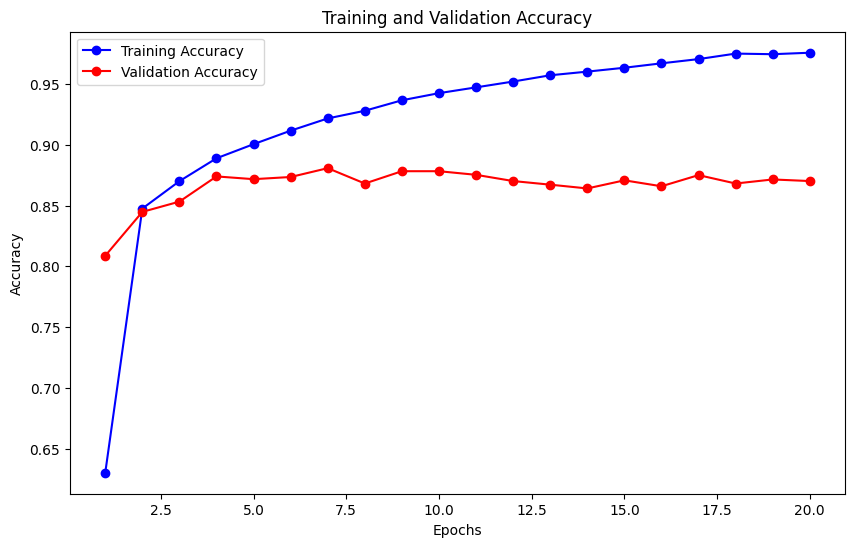

In [ ]:
import matplotlib.pyplot as plt

# Extracting accuracy and validation accuracy from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Creating a count of the number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Observations:__________**
* Both the training and validation accuracies increase sharply in the first few epochs; the model is quickly learning from the training data.
*  From around epoch 5 onwards, there's a noticeable gap between the training and validation accuracy, which may be indicative of overfitting. The model is performing better on the training data compared to the validation data.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
import random
import os

# Import Keras backend to manage things like the session state
from tensorflow.keras import backend as K

# Clearing the current TensorFlow graph and starting a new one; helpful to avoid clutter from old models and layers
K.clear_session()

# Set a specific number to make the random processes repeatable
seed_value = 42

# Ensure that Python’s hash-based operations are consistent and repeatable
os.environ['PYTHONHASHSEED'] = str(seed_value)

# Make Python's random number generation repeatable by setting a seed
random.seed(seed_value)

# Ensure NumPy's random numbers are predictable by setting a seed
np.random.seed(seed_value)

# Make TensorFlow's random number generation consistent by setting a seed
tf.random.set_seed(seed_value)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def cnn_model_2(input_shape, num_classes):
    model = Sequential()

    # First Convolutional layer
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.1))

    # Second Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Max-pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Batch Normalization layer
    model.add(BatchNormalization())

    # Third Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Fourth Convolutional layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Max-pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Batch Normalization layer
    model.add(BatchNormalization())

    # Flatten the output
    model.add(Flatten())

    # Dense layer
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))

    # Dropout layer
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Assuming your preprocessed data is loaded into X_train_normalized, y_train_encoded, etc.
input_shape = (32, 32, 1)
num_classes = 10

# Create the model
model_2 = cnn_model_2(input_shape, num_classes)

# Print the model summary
model_2.summary()

# Fit the model on the training data
history_2 = model_2.fit(
    X_train_normalized, y_train_encoded,
    validation_split=0.2,
    batch_size=128,
    verbose=1,
    epochs=30
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

### **Plot the Training and Validation accuracies and write your observations.**

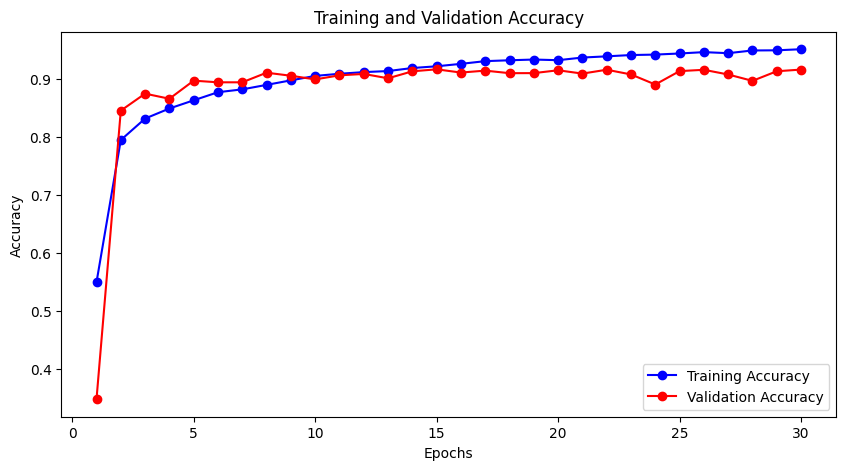

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history_2' is the history object returned from the 'fit' function
# Extract the accuracy and validation accuracy
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Plot the accuracies
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Observations:________**

* Both the training and validation accuracies increase sharply in the first few epochs; the model is quickly learning from the training data.
* The training accuracy (in blue) consistently remains higher than the validation accuracy (in red)
* There is a small gap between the training and validation accuracies, suggesting that the model is generalizing reasonably well, and overfitting is likely not severe.
* The stabilization of accuracy indicates that running the training for more epochs is unlikely to result in significant improvements without changes to the model or training process.


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

563/563 [==============================] - 27s 48ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1814
           1       0.89      0.93      0.91      1828
           2       0.94      0.90      0.92      1803
           3       0.90      0.89      0.89      1719
           4       0.94      0.92      0.93      1812
           5       0.90      0.92      0.91      1768
           6       0.92      0.88      0.90      1832
           7       0.92      0.94      0.93      1808
           8       0.93      0.88      0.90      1812
           9       0.90      0.92      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000

Confusion matrix:
[[1726   21    5    4    7    1    9    7    6   28]
 [  26 1700    6   15   25    6    4   29    6   11]
 [  15   18 1620   30   19    3    2 

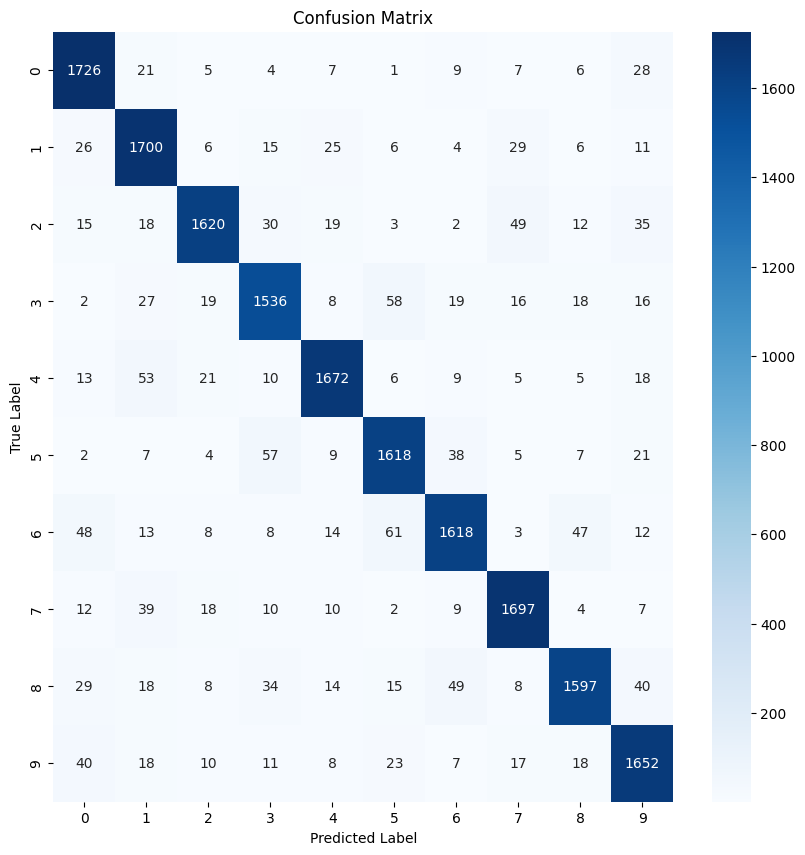

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make predictions with the model
predictions = model_2.predict(X_test_normalized)

# The predictions are in one-hot encoded format, convert them to labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert the one-hot encoded test labels back to class labels if they are in one-hot encoded format
true_classes = np.argmax(y_test_encoded, axis=1)

# Print the classification report
print("Classification report:")
print(classification_report(true_classes, predicted_classes))

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion matrix:")
print(conf_matrix)

# Plotting the confusion matrix
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:_________**

Classification Report:

* The precision, recall, and F1-scores for each class (0 through 9) are all above 0.88, which indicates a high level of accuracy in predictions across all classes.
The class with the highest precision (0.94) is class 2 and class 4, which means these classes have the lowest number of false positives.
* The class with the highest recall (0.95) is class 0, indicating that it has the lowest number of false negatives.
* The F1-score is high for all classes, with class 0 and class 4 having the highest F1-score (0.93), reflecting a good balance between precision and recall for those classes.
* Overall accuracy is 0.91, which is the proportion of total true predictions over all predictions made.
The macro average and weighted average scores are also very high (0.91), suggesting that the model is performing well across all classes, without significant bias towards any particular class.

Confusion Matrix:

* The confusion matrix shows how predictions are distributed across true labels. Most values are on the diagonal, which indicates correct classifications.
* Off-diagonal values represent misclassifications. For example, class 3 has been confused with class 5 and class 8 58 and 58 times, respectively, which might suggest some visual similarities causing confusion for the model.
* Most misclassifications are low in number compared to the correct predictions, as seen by the larger numbers on the diagonal.

**CONCLUSION**

* The ANN has an overall accuracy of 0.76, which is lower than the CNN's accuracy of 0.91.
* The precision, recall, and F1-scores for the ANN are generally lower across all classes compared to the CNN.
* The highest F1-score for the ANN is for class 4 at 0.81, which is still lower than the lowest F1-score for the CNN (class 8 at 0.88).

The CNN performed significantly better than the ANN based on the provided metrics. The CNN has higher accuracy, precision, recall, and F1-scores for each class and on average. This is consistent with expectations since CNNs are designed to capture spatial and temporal dependencies in image data, making them better suited for image classification tasks compared to ANNs. The ANN might require more sophisticated feature engineering or a different architecture to match the performance of the CNN on this particular task.


In [9]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Project/Project 2: High_Code_SVHN_Digit_Recognition.ipynb'

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Colab Notebooks/Project/Project 2: High_Code_SVHN_Digit_Recognition.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instea